In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
import nltk
nltk.download('punkt') 
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<class 'pandas.core.frame.DataFrame'>


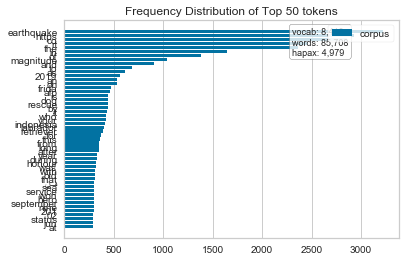

In [7]:
# loadning a file that I previously cleaned. There were 4 files, first (normative) with the most popular positive emotions(words)on twitter
#second (normative) with the most popular negative emotions(words)on twitter, third with tweets people tweet during an earthquake,
#fourth (combined)- it contained only the tweets that had the numeric indication of how many positive or negative emotions/words particular tweet contained (earthquakepn.p) 
 
corpus = pickle.load(open('earthquakepn.p', 'rb'))
print(type(corpus))

#print(corpus[0])
corpus = corpus[0].values.tolist() #trying to retrieve the names of the emotions in tweets(so far you can see the number of the emotions in tweet(earthquakepn.p))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(X)
visualizer.poof()

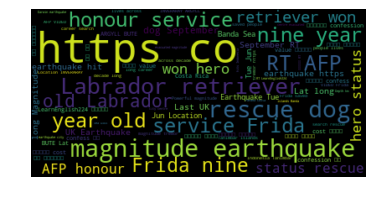

In [8]:
# generating  a bag of words or worldcloud
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

a = str()
for i in corpus:
    a += ''.join(i)

#print(a)

wordcloud = WordCloud(max_font_size=50, max_words=450, background_color="black").generate(a)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
with (open('./earthquake.p', 'rb')) as file:#read bites
    list_of_tweet = pickle.load(file)
    file.close()

In [10]:
negative = pd.read_csv("./negative.csv")
positive = pd.read_csv("./positive.csv")
tweetsdf = pd.DataFrame()

for tweet in list_of_tweet:
    tweetsdf = tweetsdf.append([tweet.text],ignore_index=True)


In [12]:
#print(tweetsdf[0].values.tolist())

In [13]:
corpus = str() # converting into a string so I could clean the corpus
for i in tweetsdf[0].values.tolist():
    corpus += ''.join(i)

import re  # cleaning in order to get the words only
corpus = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', corpus)
words = nltk.word_tokenize(corpus)
#print(words)
#link like the one here: //t.co/L3ysRKeMk5USGS' , were causing enormous problems

In [14]:
import string
table = str.maketrans('','', string.punctuation)# wanting to store unneeded language parts in a table
stripped = [w.translate(table) for w in words]
#print (stripped)

In [15]:
words = [word for word in words if len(word) > 3]
words = [word for word in words if not word.isnumeric()]
words = [word.lower() for word in words ]
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
arabic_stops = stopwords.words('Arabic') #I've seen too many Arabic words
words = [word for word in words if word not in arabic_stops]
words = [word for word in words if word not in all_stopwords]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.items():
    print('{};{}'.format(word, frequency))

magnitude;947
earthquake;2906
granite;2
falls;3
unitedstates;5
reports;46
m2.0999999;1
washington;64
7/2/19;2
20:14:44;1
quake;190
jordanbateman;1
soniafurstenau;1
major;38
site;7
could;20
pollute;1
shawnigan;1
lake;8
sooke;1
lake…;1
stops;9
l0gg0l;9
near;210
kazerun;10
iran;21
00:13;10
morning;25
depths;10
indication;9
whatsoeve…mb;1
south;25
australia;111
region;153
date;60
time;107
2019-07-02;6
19:51:46.0;1
loc…;3
caused;55
earthquake21:02;1
last;261
22:16:11;11
location;239
kilchrenan;12
argyll/bute;11
lat/long;223
56.369;11
-5.128;11
1.8rt;2
cangeotechj;1
july;21
issue;8
multitude;2
topics;2
including;4
remediation;2
liquefiable;2
soft;2
silts;2
ground;21
vibrations;2
mining;1
blas…google;1
maps;2
show;5
epicenters;1
crisis;2
navigation;1
cnet;1
whatsoeve…rt;3
whatsoeve…canada;1
likely;3
brexit;5
addled;1
rolling;1
trade;1
deal;2
southern;20
alaska;9
19:30:00.8;1
location…;8
kerrs_journey;3
🙌🏻🙌🏻🙌🏻;3
today;87
days;19
routine;7
broken;19
check;43
surprised;4
greenock;5
earthquake…rt

15:28;3
cern…;3
is…crazy;1
1960s;1
shows;43
devastation;1
يتنازل…johnny;1
يتنازل…19:02;1
kingcoyne;1
nsmvlls;1
couchmamba;1
jlew1050;1
oblivion;1
bhahahahaha;1
whatever;6
have…;2
shard;1
occurred;4
babe;1
wants;1
classy;1
wairoa;4
yamkin1;4
korea;2
hating;1
juste;1
l'incompréhension;1
tyler;1
creator;1
l'album;1
numero;1
etats-unis;1
j'ai;1
regardé;1
cli…;1
…m2.6;1
euniceangeli;1
earthquake18:02;1
kiis1065;1
5sos;1
itstomwhitaker;1
save;8
cataclysmrt;1
loveisland;4
villa;1
season;2
prayforpamp;1
tillzier;1
brunt;2
digital;2
felt;109
either;3
leetwimberly;2
umfpt;2
dcoronata;2
crypt_oguru;3
thewestonmike;2
hugh_bothwell;2
aprilligeia;2
truth77670779;1
jcvampuk…;1
way…;1
plate;10
boundaries;10
awesome;52
graphic;10
explai…rt;3
ethiopia;3
14:26:33.4;1
13.43;1
thepoeticharlot;1
wanting;1
forever;4
knowing;2
aftershocks;11
moment;6
yo…17:02;1
0.8wanting;1
moment…;1
haunt…;1
is…m2.4;1
painesreason;1
malo_j;1
umfpt…;1
…cuz;1
chiangmai;1
every;10
corner;1
step;2
cribagejim;2
يتنازل…i;1
truly;4

italy…one;1
civil;2
attending;2
roa…;1
nord;2
nouvelle-zélande;1
autre;1
sous-marin;1
fois;2
vient;1
uopsces;1
london;6
come…;2
slushiimusic;1
yultron;1
wearebellecour;1
fluxpavilion;1
elohimmusic;1
wiwekdj…;1
definitely;5
sick;1
metrouk10:02;1
shelterbox;11
tangjiahe;6
reserve;6
tent;6
keeper;6
perhaps…new;1
hour;7
loud;6
long-drawn;1
low-pitched;1
shelves;1
vibrated;1
technology;2
ensure;2
earthquake-ready;4
venues;4
olympic;2
paralympic;2
games;3
earthqu…in;1
worst…;1
archives;1
derbychrisw;1
self-help;1
forget;2
0.8mb;1
06:48:48.2;1
russia…rt;5
russia…mb;1
07:04:22.4;1
auckland;2
moving;3
me..an;1
apple;1
wrong;2
suggestions;1
sunny;1
kyogre;1
roserade;1
venusaur;1
russia…s.e.e.k;1
russia…located;1
0.8a;1
client;1
noticed;6
forming;1
stone;2
cottage;1
wall;1
james;3
cau…;1
and…2019-06-27-13.00;1
aardbeving;6
treft;3
dode;4
alpine;8
geolsoc;8
identification;8
expression;9
earthquake-induced;9
surface;10
groundwater;10
using;37
detailed;9
regolith;9
mapping;8
the…tell;1
strangers;1
r

bhein3;1
artdirectorbyu;1
mattsbn;1
kickoffs/tips;1
getfrida;1
historical;1
flashbacks;1
northwest…;1
mexcc;3
rescuedog;4
after…rt;1
startup;1
provides;1
30-second;1
iot-based;1
whirlwind;1
enjoy;1
robblesfield;1
emmerdalert;1
themacavelli;1
done;3
fuckin;2
bitchrt;2
gained…that;1
gained…discounting;1
gimmicks;1
conceivably;1
portrayed;1
younger;1
wrestlers;1
bushwhacker;1
butc…;1
…20:02;1
1.7did;1
tearing;1
cheese;1
analogy;1
m7.2;17
illustrating;1
swift…;1
dear;1
scott;1
annie;1
lennox;1
concert;1
sitting;1
secon…;1
structure;1
thanx;1
admiring;1
definitely.rt;1
bigrockrailway;1
starry;2
paintbrush;1
however;1
obvious;1
radarsat;1
scene;2
decorrelation;1
try.rt;1
davysdpatterson;1
crikey;1
goin;1
🤪lunch;1
courtesy;1
preschooler;1
returned;1
labra…rt;23
uhhhh;1
paint;1
fringes;1
selfie;1
.and;1
punished;1
skijump;2
earthquakeguy;106
photo;40
portalberni;38
vancouverisland;75
outside…3-d;1
masters;1
hap…;1
frankiemacd;1
uploaded;1
old…i;1
fucked;1
hail;1
sulfure;1
upon;1
201…it;1
scary

In [16]:
list_of_positive_words_from_tweets = list()
list_of_negative_words_from_tweets = list()
for item in positive['word']:
    if item in fdist:
        if '/' not in item:
            dict_pair = {item : int(fdist[item])}
            list_of_positive_words_from_tweets.append(dict_pair)

for item in negative['Word']:
    if item in fdist:
        if '/' not in item:
            dict_pair = {item : fdist[item]}
            list_of_negative_words_from_tweets.append(dict_pair)


#print(fdist['steve'])

def check_which_word_in_set(word):
    pass

In [3]:
#print(list_of_positive_words_from_tweets)

In [17]:
#print(list_of_negative_words_from_tweets)

In [18]:
# list_of_positive_words_from_tweets = [w for w in list_of_positive_words_from_tweets if type(w) == 'dict']
positive_sentence_to_visualization = str()
for item in list_of_positive_words_from_tweets:
   
    #print(item)
    # for k,v in item.item()
    
    # to range I would like to add item[k] but i got indicies error
    for k in item:
    
        for i in range(item[k]):
            positive_sentence_to_visualization += k + ','

In [19]:
#print(positive_sentence_to_visualization)



In [20]:
negative_sentence_to_visualization = str()
for item in list_of_negative_words_from_tweets:
    
    #print(item)
    # for k,v in item.item()
    
    # to range I would like to add item[k] but i got indicies error
    for k in item:
    
        for i in range(item[k]):
            negative_sentence_to_visualization += k + ','

In [21]:
#print(negative_sentence_to_visualization)


In [22]:
words_array = np.array(words) 
unique_words_array = np.unique(words_array)

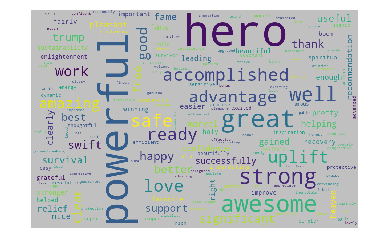

In [23]:
positive_cloud = WordCloud(max_font_size=120, width=900, height=600, background_color="silver", collocations=False).generate(positive_sentence_to_visualization)
negative_cloud = WordCloud(max_font_size=150, width=900, height=600, background_color="black", collocations=False).generate(negative_sentence_to_visualization)
collocations=False
plt.figure()
plt.imshow(positive_cloud)
positive_cloud.to_file("positive_cloud.png")
plt.axis("off")
plt.show()

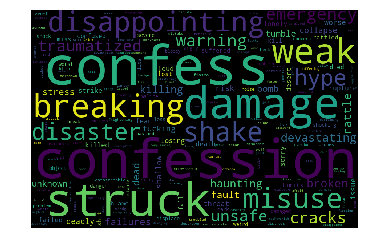

In [24]:
plt.figure()

plt.imshow(negative_cloud)
negative_cloud.to_file("negative_cloud.png")
plt.axis("off")
plt.show()

In [95]:
#source: https://www.datacamp.com/community/tutorials/wordcloud-python
#secondary source: stack overflow

In [ ]:
#things you may consider:  # print(type(item))
    # print(item.items()) in the line that top comment says: # list_of_positive_words_from_tweets = [w for w in list_of_positive_words_from_tweets if type(w) == 'dict']